In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import LSTM, Dense

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
BBCA = pd.read_csv('/content/drive/My Drive/Project/Data Science/BCA Stock Prediction/inputs/BBCA.JK.csv')
BBCA.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-07,18350.0,18550.0,18325.0,18500.0,17703.326172,16452000
1,2017-07-10,18500.0,18650.0,18250.0,18300.0,17511.939453,8101200
2,2017-07-11,18325.0,18450.0,18250.0,18325.0,17535.861328,12320700
3,2017-07-12,18200.0,18475.0,18100.0,18425.0,17631.556641,17839300
4,2017-07-13,18500.0,18525.0,18275.0,18500.0,17703.326172,12891200


In [3]:
BBCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       780 non-null    object 
 1   Open       780 non-null    float64
 2   High       780 non-null    float64
 3   Low        780 non-null    float64
 4   Close      780 non-null    float64
 5   Adj Close  780 non-null    float64
 6   Volume     780 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 42.8+ KB


In [4]:
BBCA.describe()

,Open,High,Low,Close,Adj Close,Volume
count,780.000000,780.000000,780.000000,780.000000,780.000000,7.800000e+02
mean,25868.461538,26100.929487,25624.967949,25864.903846,25193.070425,1.484327e+07
std,4192.325252,4212.168318,4162.273540,4181.034472,4292.136106,9.189079e+06
min,18200.000000,18350.000000,18100.000000,18225.000000,17440.167969,0.000000e+00
25%,22800.000000,22918.750000,22493.750000,22725.000000,21970.435547,9.570825e+06
50%,25637.500000,26012.500000,25412.500000,25825.000000,25101.101563,1.331690e+07
75%,29481.250000,29781.250000,29100.000000,29400.000000,28967.158203,1.836250e+07
max,34750.000000,35300.000000,34175.000000,34375.000000,33790.851563,7.988280e+07


In [5]:
import plotly.graph_objects as go
import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=BBCA['Date'],
                open=BBCA['Open'],
                high=BBCA['High'],
                low=BBCA['Low'],
                close=BBCA['Close'])])
fig.show()

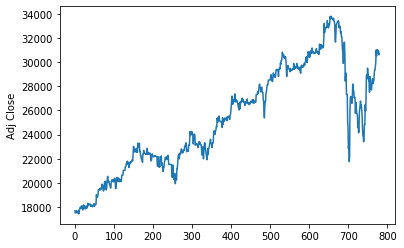

In [6]:
BBCA['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.show()

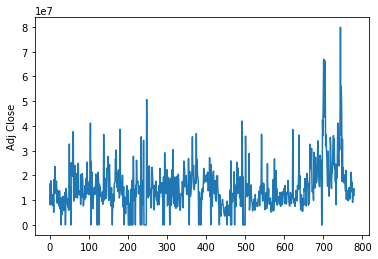

In [7]:
BBCA['Volume'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.show()

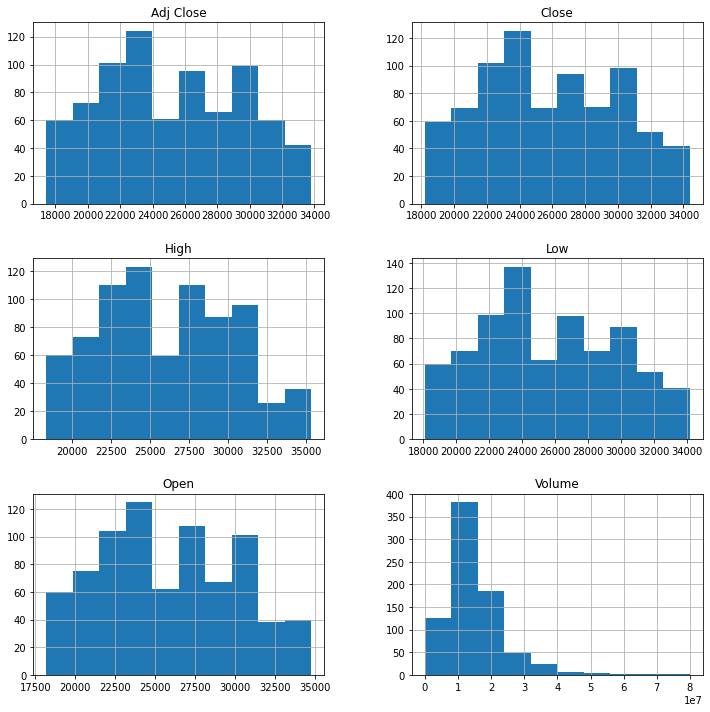

In [8]:
BBCA.hist(figsize=(12, 12));

# Calculate Moving Average

In [9]:
ma_day = [10, 20, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  BBCA[column_name] = BBCA['Adj Close'].rolling(ma).mean()

BBCA.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')

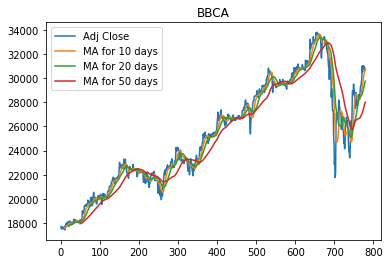

In [10]:
BBCA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('BBCA')
plt.show()

# Daily Return

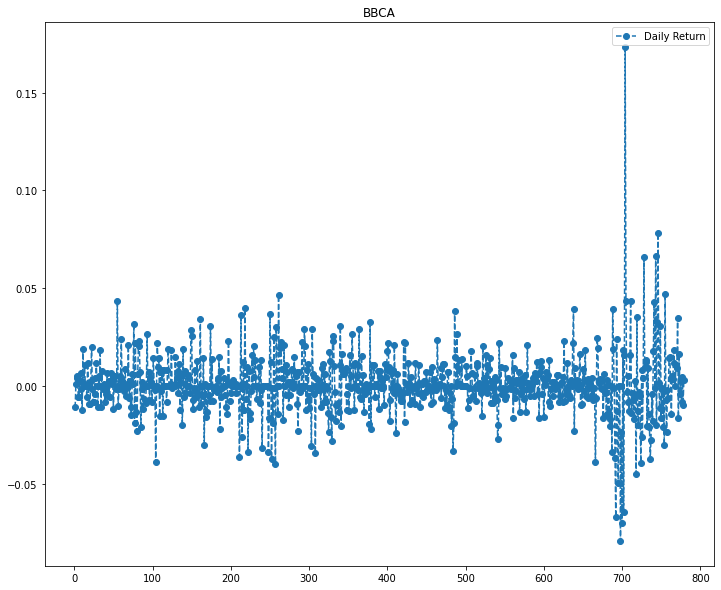

In [11]:
plt.figure(figsize=(12,10))
BBCA['Daily Return'] = BBCA['Adj Close'].pct_change()
BBCA['Daily Return'].plot(legend=True, linestyle='--', marker='o')
plt.title('BBCA')
plt.show()

Menampilkan kesuluruhan "Daily Return" menggunakan Historgram

Text(0.5, 1.0, 'BBCA Daily Return')

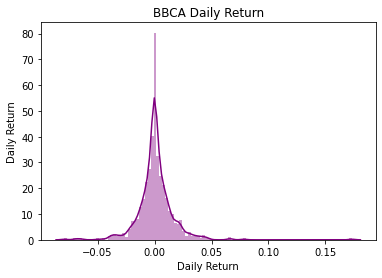

In [12]:

sns.distplot(BBCA['Daily Return'].dropna(), bins=100, color='purple')
plt.ylabel('Daily Return')
plt.title('BBCA Daily Return')

## What was the correlation between different stocks closing prices

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

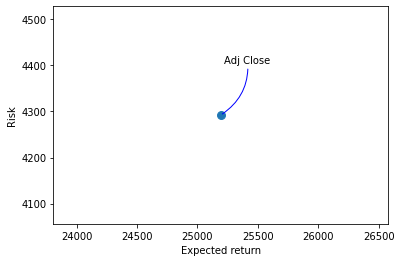

In [13]:
tech = BBCA[['Date','Adj Close']].set_index('Date')

rets = tech.dropna()

area = np.pi*20
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

## Predicting the closing price stock price

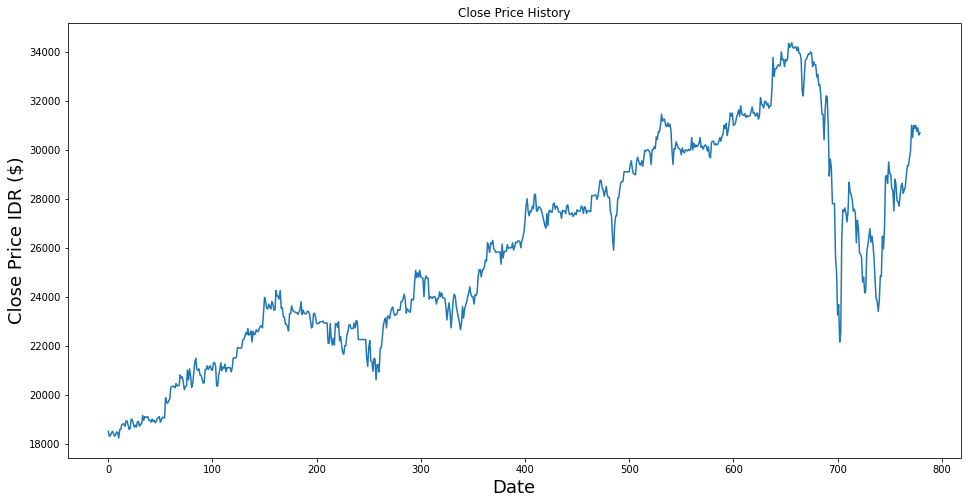

In [14]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(BBCA['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price IDR ($)', fontsize=18)
plt.show()

In [15]:
#Create a new dataframe with only the 'Close column
data = BBCA.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

624

In [16]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01702786],
       [0.00464396],
       [0.00619195],
       [0.0123839 ],
       [0.01702786],
       [0.01083591],
       [0.00464396],
       [0.00773994],
       [0.01547988],
       [0.01393189],
       [0.        ],
       [0.02167183],
       [0.02167183],
       [0.03405573],
       [0.03560372],
       [0.03560372],
       [0.02941176],
       [0.04334365],
       [0.04334365],
       [0.03250774],
       [0.02167183],
       [0.0247678 ],
       [0.04798762],
       [0.04643963],
       [0.0371517 ],
       [0.02786378],
       [0.03250774],
       [0.02786378],
       [0.04179567],
       [0.04179567],
       [0.02941176],
       [0.03560372],
       [0.03560372],
       [0.05727554],
       [0.04489164],
       [0.05417957],
       [0.05263158],
       [0.05263158],
       [0.05417957],
       [0.04489164],
       [0.04489164],
       [0.04024768],
       [0.04798762],
       [0.04179567],
       [0.04489164],
       [0.03869969],
       [0.04179567],
       [0.049

In [17]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.01702786, 0.00464396, 0.00619195, 0.0123839 , 0.01702786,
       0.01083591, 0.00464396, 0.00773994, 0.01547988, 0.01393189,
       0.        , 0.02167183, 0.02167183, 0.03405573, 0.03560372,
       0.03560372, 0.02941176, 0.04334365, 0.04334365, 0.03250774,
       0.02167183, 0.0247678 , 0.04798762, 0.04643963, 0.0371517 ,
       0.02786378, 0.03250774, 0.02786378, 0.04179567, 0.04179567,
       0.02941176, 0.03560372, 0.03560372, 0.05727554, 0.04489164,
       0.05417957, 0.05263158, 0.05263158, 0.05417957, 0.04489164,
       0.04489164, 0.04024768, 0.04798762, 0.04179567, 0.04489164,
       0.03869969, 0.04179567, 0.0495356 , 0.05108359, 0.05417957,
       0.04024768, 0.04643963, 0.05263158, 0.05108359, 0.05108359,
       0.10216718, 0.08978328, 0.08823529, 0.09442724, 0.09907121])]
[0.12848297213622306]

[array([0.01702786, 0.00464396, 0.00619195, 0.0123839 , 0.01702786,
       0.01083591, 0.00464396, 0.00773994, 0.01547988, 0.01393189,
       0.        , 0.02167183, 0.02

In [18]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
564/564 [==============================] - 189s 335ms/step - loss: 0.0026
Epoch 2/10
564/564 [==============================] - 187s 332ms/step - loss: 0.0013
Epoch 3/10
564/564 [==============================] - 186s 331ms/step - loss: 0.0011
Epoch 4/10
564/564 [==============================] - 186s 330ms/step - loss: 9.5498e-04
Epoch 5/10
564/564 [==============================] - 185s 328ms/step - loss: 9.7553e-04
Epoch 6/10
564/564 [==============================] - 184s 326ms/step - loss: 7.4802e-04
Epoch 7/10
564/564 [==============================] - 182s 323ms/step - loss: 6.3403e-04
Epoch 8/10
564/564 [==============================] - 182s 323ms/step - loss: 6.4356e-04
Epoch 9/10
564/564 [==============================] - 182s 323ms/step - loss: 7.9281e-04
Epoch 10/10
564/564 [==============================] - 182s 323ms/step - loss: 6.6260e-04


In [20]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

962.6964724562163

In [21]:
%cd /content/drive/My Drive/Project/Data Science/BCA Stock Prediction

/content/drive/My Drive/Project/Data Science/BCA Stock Prediction


In [22]:
model.save('lstm.h5')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



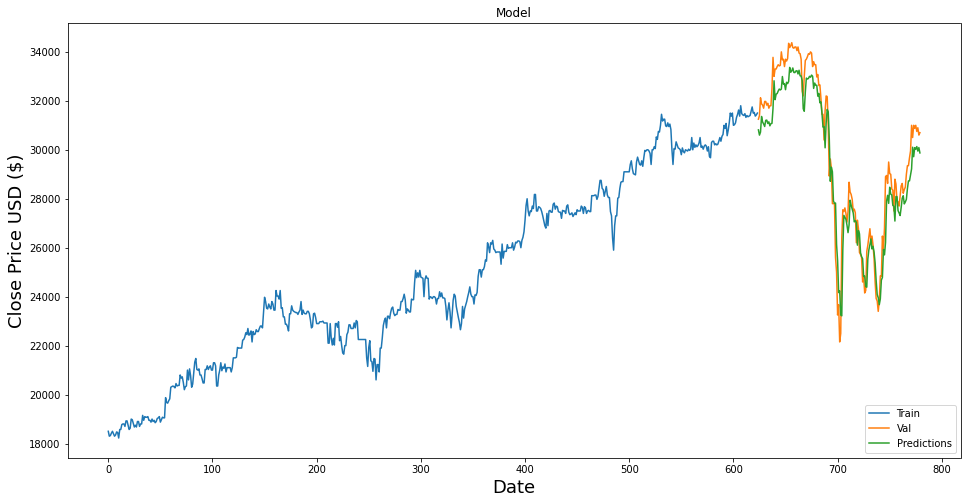

In [23]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [24]:
valid

,Close,Predictions
624,31250.0,30813.162109
625,31400.0,30598.904297
626,32125.0,30722.779297
627,31875.0,31361.150391
628,31825.0,31136.099609
...,...,...
775,31000.0,30020.281250
776,30750.0,30131.353516
777,30900.0,29947.289062
778,30600.0,30090.074219
